# Подготовка среды и датасетов

In [76]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [131]:
plt.rcParams['figure.figsize'] = 12, 8

In [171]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

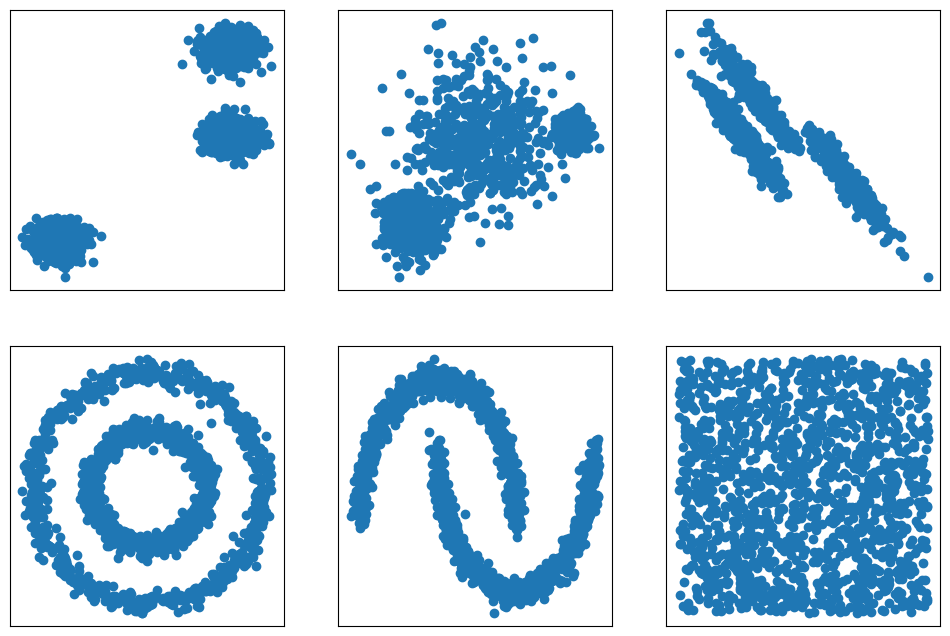

In [166]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(2, 3, i)  
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1])


       
    

# KMeans

Интерактивная визуализация работы KMeans – https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Для примера из видео: **Random** $\rightarrow$ **Packed Circles**

![KMeans](https://www.jeremyjordan.me/content/images/2016/12/kmeans.gif "KMeans")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [134]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=8, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300
                )

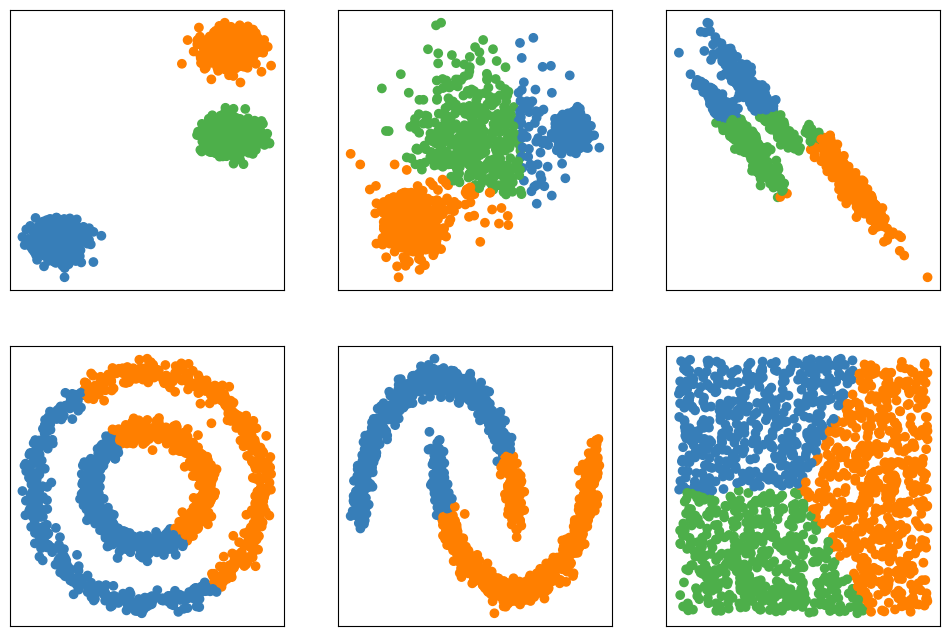

In [135]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    k_means = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means.fit(X)
    y_pred = k_means.labels_.astype(int)  # Исправление здесь

    plt.subplot(2, 3, i)
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

plt.show()


# EM-алгоритм

![EM-алгоритм](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif "EM-алгоритм")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [136]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=1, 
                        max_iter=100,
                        init_params='kmeans' # 'kmeans’, ‘random’
                       )

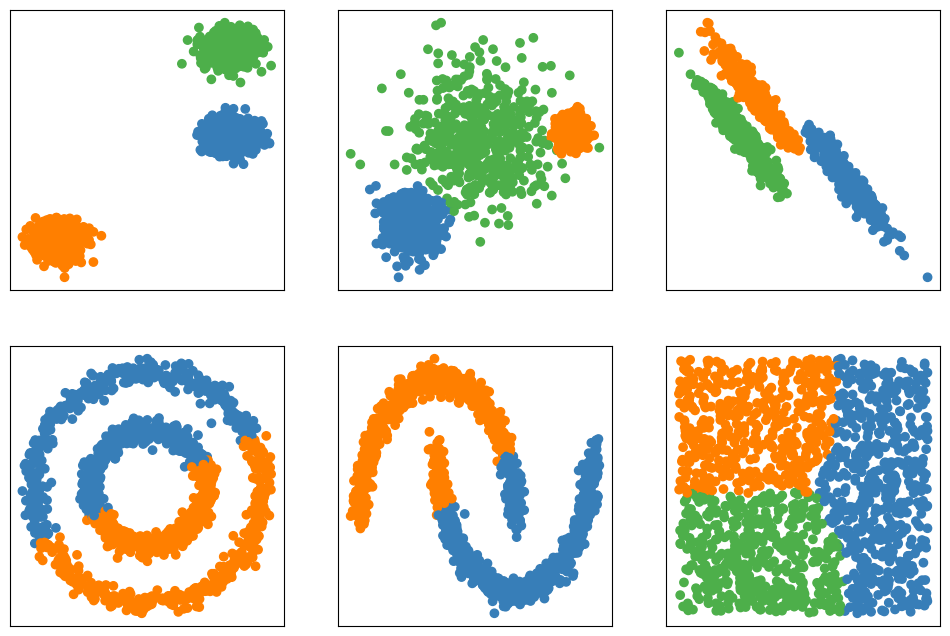

In [137]:
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, em_gm_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    em_gm = GaussianMixture(n_components=em_gm_params['n_clusters'])
    
    em_gm.fit(X)
    y_pred = em_gm.predict(X)

    plt.subplot(2, 3, i)  
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

plt.show()


# Агломеративная кластеризация

![AG](https://media.giphy.com/media/pSNCWCEAsgrAs/giphy.gif "Агломеративная кластеризация")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [138]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean', # “euclidean”, “l1”, “l2”, “manhattan”, 
                                                   # “cosine”, or “precomputed”
                             linkage='ward', # “ward”, “complete”, “average”, “single”
                            )

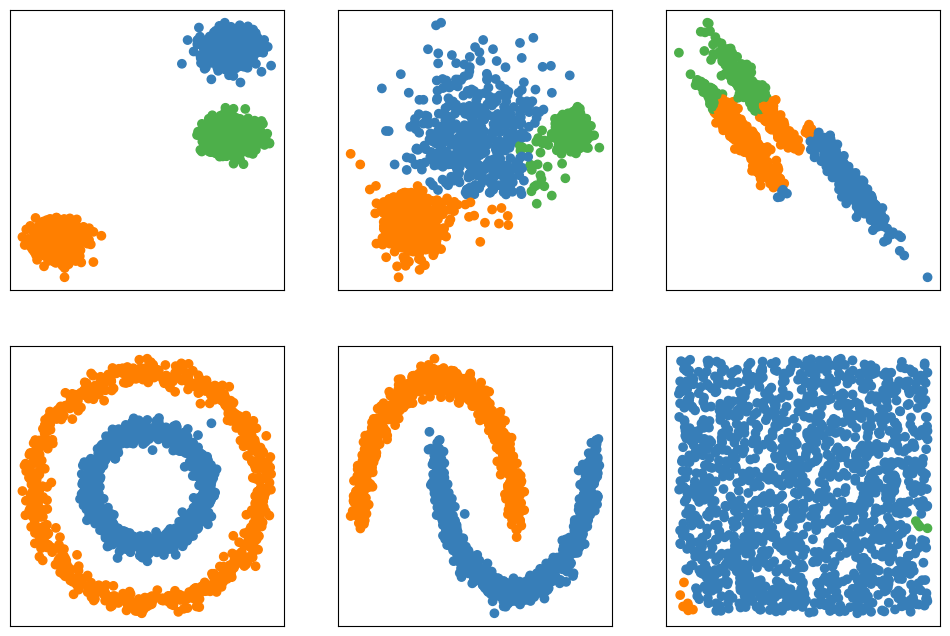

In [139]:
import warnings

from sklearn.neighbors import kneighbors_graph

datasets_params_list = [
    (blobs, {'n_clusters': 3, 'n_neighbors': 10}),
    (varied, {'n_clusters': 3, 'n_neighbors': 2}),
    (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
    (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
    (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
    (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, 
                                    n_neighbors=ac_params['n_neighbors'], 
                                    include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], 
                                 linkage='average',
                                 connectivity=connectivity)
    
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(int)

    plt.subplot(2, 3, i)  
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

# DBSCAN

Интерактивная визуализация работы DBSCAN – https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

Для примера из видео: **Pimpled Smiley**

![DBSCAN](https://media0.giphy.com/media/lCL2GQewp7fkk/giphy.gif "DBSCAN")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [140]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,
                min_samples=5)

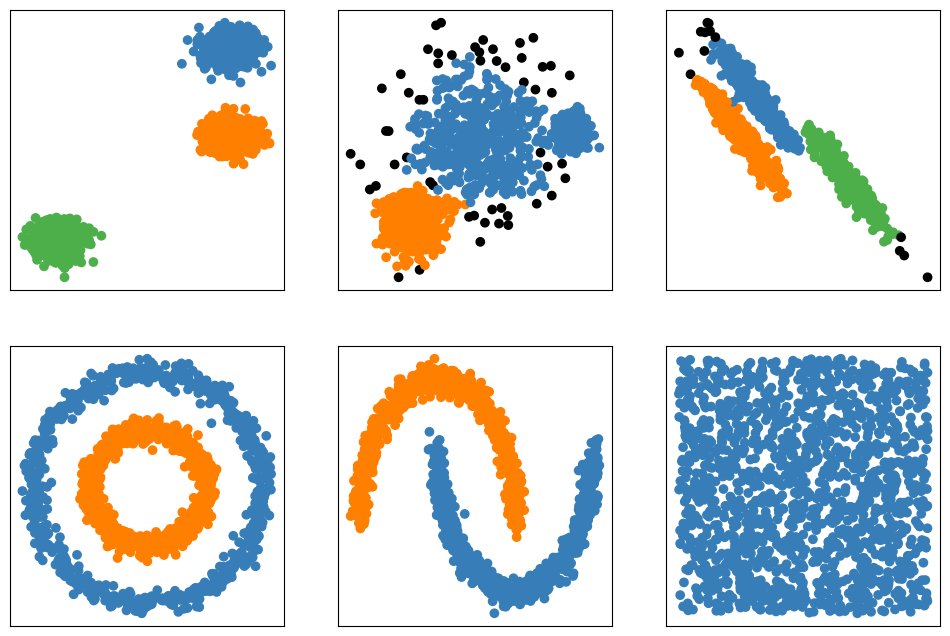

In [141]:
datasets_params_list = [
    (blobs, {'eps': 0.3}),
    (varied, {'eps': 0.18}),
    (aniso, {'eps': 0.184}),
    (noisy_circles, {'eps': 0.3}),
    (noisy_moons, {'eps': 0.3}),
    (no_structure, {'eps': 0.3})]

for i, (X, dbscan_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    dbscan = DBSCAN(eps=dbscan_params['eps'])
    
    dbscan.fit(X)
    y_pred = dbscan.labels_.astype(int)

    plt.subplot(2, 3, i)
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # чёрным цветом отметим выбросы
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

In [88]:
#7.5.1
kmeans = KMeans(n_clusters=3, init='random')

In [142]:
#7.5.2
k_means = KMeans(n_clusters=3, random_state=42)

k_means.fit(X)

centroids = k_means.cluster_centers_

rounded_centroids = np.round(centroids).astype(int)

print(rounded_centroids)

k_means.labels_

[[-1  1]
 [ 1  0]
 [-1 -1]]


array([2, 0, 1, ..., 1, 1, 1], dtype=int32)

In [90]:
#7.5.3
import numpy as np

# Получаем метки кластеров для каждого объекта
k_means_pred = k_means.labels_

# Подсчитываем количество элементов в каждом кластере
_, counts = np.unique(k_means_pred, return_counts=True)

# Выводим количество элементов в каждом кластере
for count in counts:
    print(count, end=' ')


480 556 464 

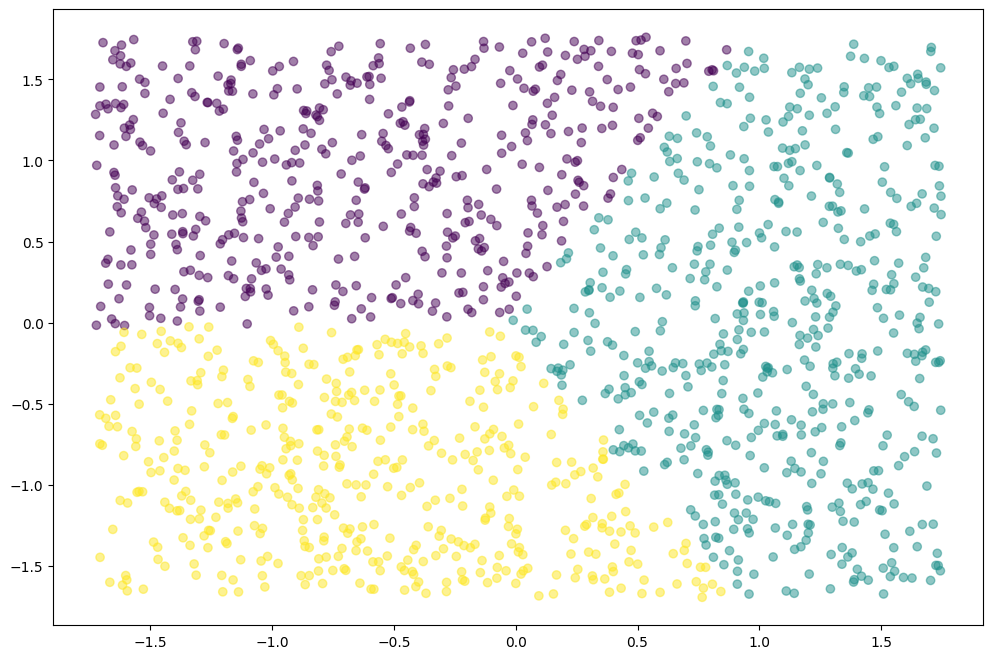

In [91]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()


In [121]:
#задача на реальных событиях
import pandas as pd


snsdata = pd.read_csv("snsdata.csv")

keywords = snsdata.iloc[:, 4:]

scaler = StandardScaler()
scaled_keywords = scaler.fit_transform(keywords)

kmeans = KMeans(n_clusters=9, random_state=123)
kmeans.fit(scaled_keywords)

cluster_labels = kmeans.labels_

cluster_labels

array([4, 0, 4, ..., 4, 4, 4], dtype=int32)

In [122]:
#7.5.4
cluster_counts = pd.Series(cluster_labels).value_counts()

min_cluster = cluster_counts.idxmin()

print(min_cluster)

5


In [94]:
k_means_pred = k_means.labels_

_, counts = np.unique(k_means_pred, return_counts=True)

min_count = min(counts)

min_cluster_index = np.where(counts == min_count)[0][0]

print(min_cluster_index + 1)


3


In [123]:
#7.5.4.2
target_interests = ['music', 'god', 'dance', 'hair', 'shopping', 'cute', 'band', 'rock', 'football', 'church']

total_students = 0
for index, row in snsdata.iterrows():
    if all(interest in row.values for interest in target_interests):
        total_students += 1

print(total_students)


0


In [96]:
#7.6.1
gmm = GaussianMixture(n_components=3, random_state=42)

In [143]:
#7.6.2
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

means = np.round(gmm.means_).astype(int)

print(means)

[[ 1  1]
 [-1  1]
 [ 0 -1]]


In [144]:
#7.6.3
cluster_labels = gmm.predict(X)

_, counts = np.unique(cluster_labels, return_counts=True)

for count in counts:
    print(count, end=' ')

467 450 583 

In [148]:
#7.6.4
data = pd.read_csv('snsdata.csv')

X = data.iloc[:, 4:].values

gmm = GaussianMixture(n_components=9, random_state=123)
gmm.fit(X)

cluster_label_8th_student = gmm.predict(X[[7]])

print("Кластер для восьмого ученика:", cluster_label_8th_student[0])

print("Количество итераций до сходимости:", gmm.n_iter_)


Кластер для восьмого ученика: 4
Количество итераций до сходимости: 32


In [149]:
#7.7.1
agglomerative_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')

agglomerative_clustering.fit(X)

num_leaves = agglomerative_clustering.n_leaves_

print("Количество листьев в иерархическом дереве:", num_leaves)


Количество листьев в иерархическом дереве: 30000


In [150]:
#7.7.2
cluster_labels = agglomerative_clustering.labels_

_, counts = np.unique(cluster_labels, return_counts=True)

for count in counts:
    print(count, end=' ')

29998 1 1 

In [151]:
#7.7.3
connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

agglomerative_clustering = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)

agglomerative_clustering.fit(X)

cluster_labels = agglomerative_clustering.labels_

_, counts = np.unique(cluster_labels, return_counts=True)

for count in counts:
    print(count, end=' ')


2907 1 27092 

Количество кластеров: 2502


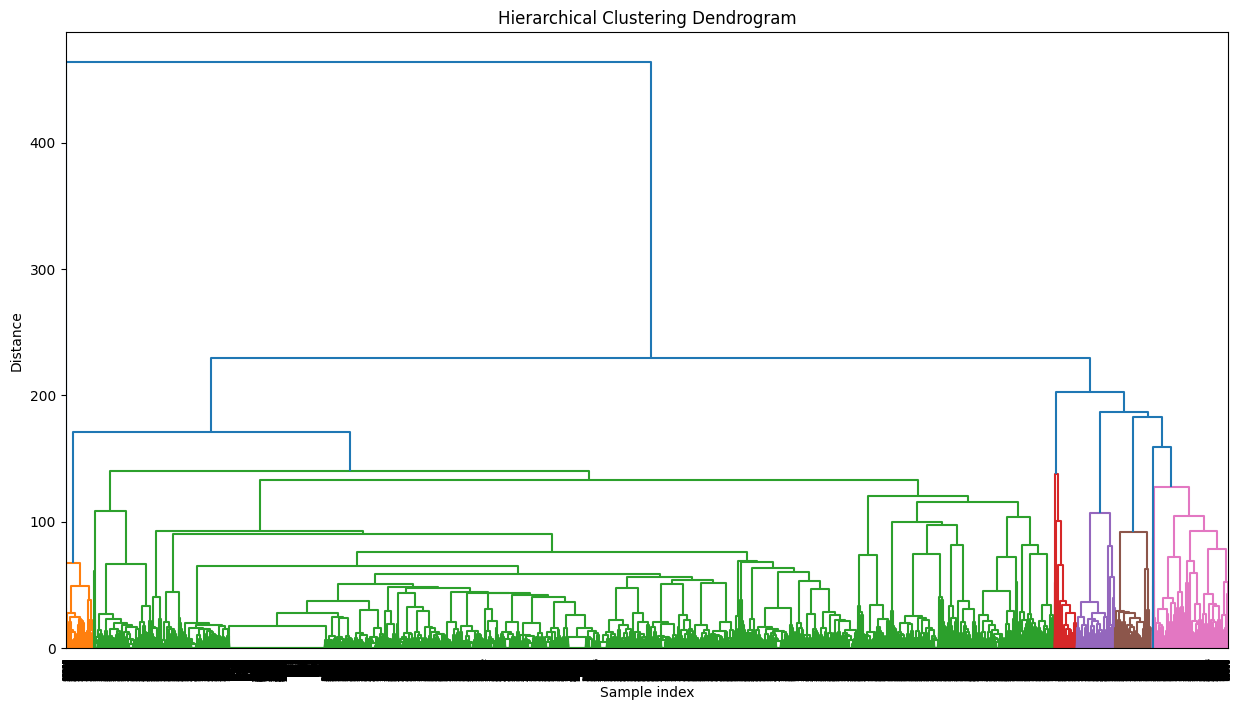

In [103]:
#7.7.4
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X, "ward")

plt.figure(figsize=(15, 8))
dendrogram(Z, leaf_rotation=90., color_threshold=150)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Подсчет количества кластеров
num_clusters = len(set(linkage(X, 'ward')[:, 3]))
print("Количество кластеров:", num_clusters)

plt.show()


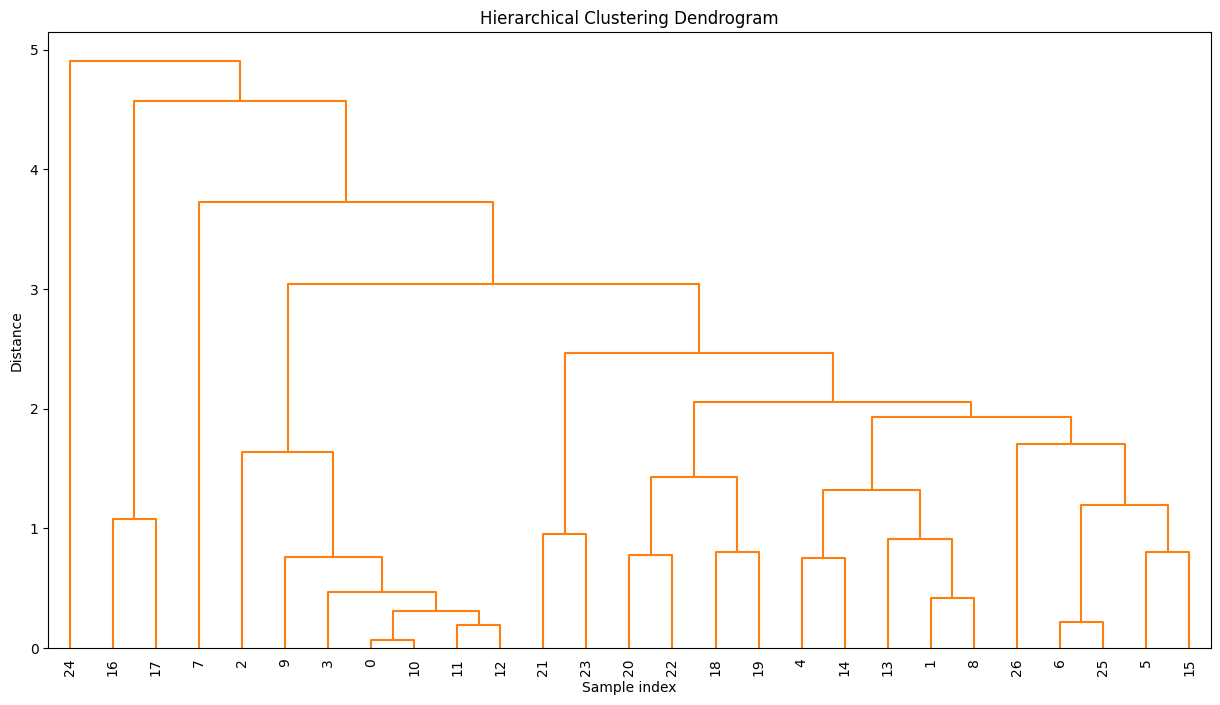

Количество кластеров при граничном расстоянии 100: 1


In [155]:
#7.7.5
from scipy.cluster.hierarchy import fcluster
food = pd.read_csv('food.txt', sep='\s+', skiprows=1, header=None, names=["Name", "Energy", "Protein", "Fat", "Calcium", "Iron"])

X = food.drop(columns=['Name'])

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

Z = linkage(X_normalized, method='average', metric='euclidean')

# Построение дендрограммы
plt.figure(figsize=(15, 8))
dendrogram(Z, leaf_rotation=90., color_threshold=100)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

t = 100
labels = fcluster(Z, t, criterion='distance')
num_clusters = len(set(labels))

print("Количество кластеров при граничном расстоянии 100:", num_clusters)


In [152]:
#7.7.6
agg_clustering = AgglomerativeClustering(n_clusters=9, linkage='ward')

agg_clustering.fit(X)

cluster_labels = agg_clustering.labels_

num_clusters = len(set(cluster_labels))
print("Количество кластеров:", num_clusters)

calcium_cluster = cluster_labels[(food['Calcium'] >= 150) & (food['Calcium'] <= 160)].tolist()[0]
print("Кластер для продуктов с содержанием кальция от 150 до 160:", calcium_cluster)

max_fat_product_index = food['Fat'].idxmax()
max_fat_product_cluster = cluster_labels[max_fat_product_index]
print("Кластер для продукта с максимальной жирностью:", max_fat_product_cluster)

Количество кластеров: 9


IndexError: boolean index did not match indexed array along dimension 0; dimension is 30000 but corresponding boolean dimension is 27

In [ ]:
#7.8.1
dbscan = DBSCAN(eps=3, min_samples=3)

In [172]:
#7.8.2
dbscan_model = DBSCAN(eps=0.9, min_samples=35)
dbscan_model.fit(X)  

labels = dbscan_model.labels_

num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Число получившихся кластеров:", num_clusters)


Число получившихся кластеров: 3


In [173]:
#7.8.3
num_outliers = sum(labels == -1)

print("Количество объектов выборки, отмеченных как выбросы:", num_outliers)

Количество объектов выборки, отмеченных как выбросы: 406


In [174]:
#7.8.4
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=35)
labels = dbscan.fit_predict(X)

num_outliers = sum(labels == -1)

print("Количество объектов выборки, отмеченных как выбросы при eps=0.8:", num_outliers)


Количество объектов выборки, отмеченных как выбросы при eps=0.8: 510
